<a href="https://colab.research.google.com/github/Cynler/BMI/blob/master/Part_1_Final_Project_Fall_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1 - Final project - Fall 2023 -  Due Monday the 12/4/2023

In the initial part of your final project, your task involves performing a numerical analysis of the title and description of a website of your choice. The project involves constructing a Lagrange polynomial that reflects the readability and keyword similarity of the website's content. Your assignment is to first become acquainted with the provided codes and the structure of the given polynomial. Subsequently, you are to determine the polynomial's root, using Newton's method or another method you prefer. You should choose an initial value and provide a brief explanation of what the root signifies in this context. Start by selecting a website, making sure you understand its primary focus or service. For instance, choosing "www.FastHaul.com" might lead you to focus on keywords such as "junk removal" or "junk Hauling" If you select "https://polygonsmedia.com," the keywords could be "Marin SEO" "Web design" or "Marketing Agency"

In [ ]:
import requests
import re
from bs4 import BeautifulSoup
from urllib.parse import urljoin

Creating a function to extract all internal links from a webpage's homepage involves several steps. The function will need to:

Fetch the content of the given URL.
Parse the HTML content to find links.
Filter out the links to keep only internal ones.
Optionally, handle redirections and errors.
Here's a simple Python function using requests to fetch the webpage and BeautifulSoup from the bs4 package to parse the HTML. This function assumes that an internal link is any link that does not start with 'http://' or 'https://', or that starts with the base URL of the provided page.

In [ ]:
def truncate_text(text, max_words):
    words = text.split()
    truncated_text = ' '.join(words[:max_words])
    return truncated_text

# Edit: Remove numbers for better keyword selection
# Pattern 11. .53 5.48
def rmv_num(text):
    pattern = r'\d*\d?\.\d*\d?'
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text


def get_page_details(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Get the title of the page, modified to search inside <head>
        title = soup.head.title.string if soup.head.title else 'No title'

        # Get the description of the page, modified to search inside <head>
        description_tag = soup.body.find("div")
        description_text = description_tag.get_text() if description_tag else 'No description'
        description = rmv_num(truncate_text(description_text, 20))
        # print(title)
        # print(description)

        return title, description

    except requests.RequestException:
        # print("request exception!")
        return 'No title', 'No description'

"""
In this function, depth controls how deep the recursion goes. A depth of 1 means it will only fetch pages directly linked from the homepage.
Increasing this number will allow the function to follow links on subsequent pages, but be cautious as this can lead to a very large number of requests.
"""
def get_internal_links_with_details(url, depth, visited=None):
    if visited is None:
        visited = set()

    if depth == 0 or url in visited:
        return []

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        visited.add(url)

        links = soup.find_all('a', href=True)

        base_url_parsed = requests.utils.urlparse(url)
        base_url = '{uri.scheme}://{uri.netloc}/manual/'.format(uri=base_url_parsed)

        page_details = []

        for link in links:
            href = link['href']
            full_url = urljoin(base_url, href)
            if full_url.startswith(base_url) and full_url not in visited:
                title, description = get_page_details(full_url)
                page_details.append((full_url, title, description))
                visited.add(full_url)
                page_details.extend(get_internal_links_with_details(full_url, depth-1, visited))

        return page_details

    except requests.RequestException as e:
        print(f"Error fetching page: {e}")
        return []

In [ ]:
# type your URL here
url = "https://orgmode.org/manual"
depth = 1  # Don't adjust this for recursion depth
internal_links_details = get_internal_links_with_details(url, depth)
for link_detail in internal_links_details:
    print(link_detail)

('https://orgmode.org/manual/Introduction.html', 'Introduction (The Org Manual)', 'Next: Document Structure, Previous: The Org Manual, Up: The Org Manual [Contents][Index] 1 Introduction Summary Installation Activation Feedback Typesetting Conventions')
('https://orgmode.org/manual/#SEC_Contents', 'Top (The Org Manual)', 'Next: Introduction [Contents][Index] The Org Manual This manual is for Org version  Copyright © 2004–2023 Free Software Foundation, Inc')
('https://orgmode.org/manual/Main-Index.html', 'Main Index (The Org Manual)', 'Next: Key Index, Previous: GNU Free Documentation License, Up: The Org Manual [Contents][Index] D Main Index Jump to: * +')
('https://orgmode.org/manual/Summary.html', 'Summary (The Org Manual)', 'Next: Installation, Up: Introduction [Contents][Index]  Summary Org Mode is an authoring tool and a TODO lists manager for GNU')
('https://orgmode.org/manual/Installation.html', 'Installation (The Org Manual)', 'Next: Activation, Previous: Summary, Up: Introduct

To select randomly 20% of the pages obtained from the get_internal_links_with_details function, you can use Python's random.sample function. This function allows you to select a specified number of items from a list randomly.

Here's a function that takes the list of pages with their titles and descriptions and returns 20% of these pages, chosen randomly:

In [ ]:
#the following randomly select 20% of the todal pages
# Lowering percentage because the size of manual
import random

def select_random_pages(pages, percentage):
    if not pages or percentage <= 0:
        return []

    number_of_pages = len(pages)
    number_to_select = max(1, int((percentage / 100) * number_of_pages))

    return random.sample(pages, number_to_select)

# Example usage
# Assume `internal_links_details` is obtained from the `get_internal_links_with_details` function
selected_pages = select_random_pages(internal_links_details, 3)
for page in selected_pages:
    print(page)


('https://orgmode.org/manual/Hyperlinks.html', 'Hyperlinks (The Org Manual)', 'Next: TODO Items, Previous: Tables, Up: The Org Manual [Contents][Index] 4 Hyperlinks Like HTML, Org provides support for links inside')
('https://orgmode.org/manual/Links-in-HTML-export.html', 'Links in HTML export (The Org Manual)', 'Next: Tables in HTML export, Previous: Headlines in HTML export, Up: HTML Export [Contents][Index]  Links in HTML export The')
('https://orgmode.org/manual/HTML-Export.html', 'HTML Export (The Org Manual)', 'Next: LaTeX Export, Previous: Beamer Export, Up: Exporting [Contents][Index]  HTML Export Org mode contains an HTML exporter with extensive')
('https://orgmode.org/manual/Advanced-Export-Configuration.html', 'Advanced Export Configuration (The Org Manual)', 'Next: Export in Foreign Buffers, Previous: Other Built-in Back-ends, Up: Exporting [Contents][Index]  Advanced Export Configuration Export hooks The export')
('https://orgmode.org/manual/Timestamps.html', 'Timestamps (

# calculate the readability

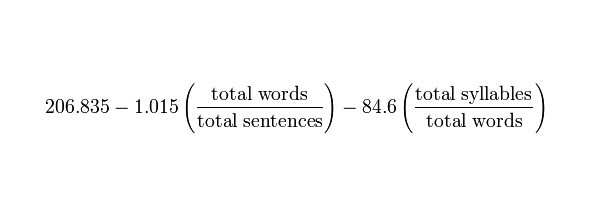
To calculate the readability of the descriptions using the [Flesch-Kincaid](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests) readability test, you can utilize the textstat library in Python, which provides an easy way to compute various readability scores, including the Flesch-Kincaid Grade Level.

First, you need to install the textstat library. You can do this using pip:

**Flesch-Kincaid Score**
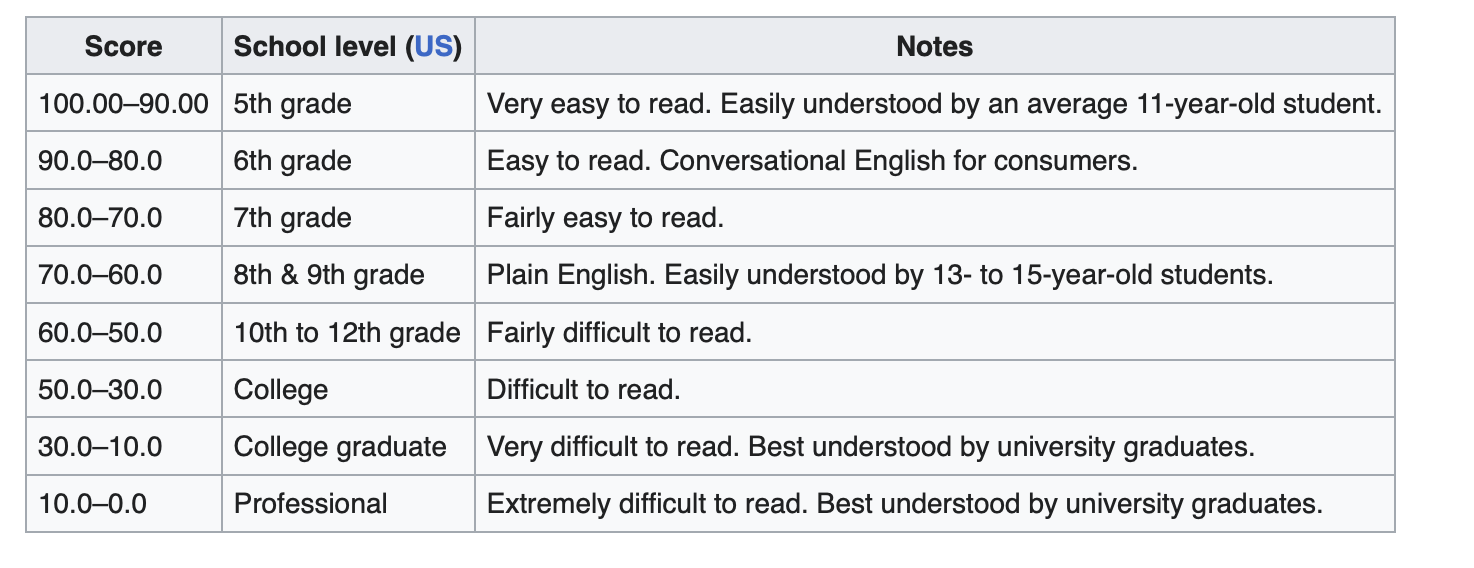
Description Readability score

In [ ]:
pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.6 MB/s eta 0:00:00


In [ ]:
import textstat

def calculate_readability(pages):
    readability_scores = []
    for url, title, description in pages:
        score = textstat.flesch_kincaid_grade(description)
        readability_scores.append((url, title, score))
    return readability_scores

# Assuming `selected_pages` is a list of selected URLs with titles and descriptions
readability_scores = calculate_readability(selected_pages)
for url, title, score in readability_scores:
    print(f"URL: {url}, Title: {title}, Flesch-Kincaid Score: {score}")


URL: https://orgmode.org/manual/Hyperlinks.html, Title: Hyperlinks (The Org Manual), Flesch-Kincaid Score: 12.3
URL: https://orgmode.org/manual/Links-in-HTML-export.html, Title: Links in HTML export (The Org Manual), Flesch-Kincaid Score: 9.5
URL: https://orgmode.org/manual/HTML-Export.html, Title: HTML Export (The Org Manual), Flesch-Kincaid Score: 13.1
URL: https://orgmode.org/manual/Advanced-Export-Configuration.html, Title: Advanced Export Configuration (The Org Manual), Flesch-Kincaid Score: 15.4
URL: https://orgmode.org/manual/Timestamps.html, Title: Timestamps (The Org Manual), Flesch-Kincaid Score: 11.9
URL: https://orgmode.org/manual/Global-and-local-cycling.html, Title: Global and local cycling (The Org Manual), Flesch-Kincaid Score: 14.2
URL: https://orgmode.org/manual/LaTeX-fragments.html, Title: LaTeX fragments (The Org Manual), Flesch-Kincaid Score: 11.9
URL: https://orgmode.org/manual/Hooks.html, Title: Hooks (The Org Manual), Flesch-Kincaid Score: 11.1
URL: https://orgm

# Natural language Processing (NLP) techniques

The following function will use simple string manipulation and natural language processing techniques to identify potentially meaningful phrases and words.

We will use the Natural Language Toolkit (nltk) for this purpose. First, ensure you have nltk installed:

In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams

In [ ]:
# Ensure the necessary NLTK components are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def extract_phrases_and_keywords(text):
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Extract phrases (n-grams) and keywords
    phrases = set()
    keywords = set()

    for sentence in sentences:
        # Tokenize the sentence into words
        words = word_tokenize(sentence)

        # Filter out stop words and single character words (like punctuation)
        filtered_words = [word for word in words if word.lower() not in stop_words and len(word) > 1]

        # Add filtered words to keywords
        keywords.update(filtered_words)

        # Create bigrams and trigrams from filtered words
        bigrams = ngrams(filtered_words, 2)
        trigrams = ngrams(filtered_words, 3)

        # Add bigrams and trigrams to phrases
        phrases.update([' '.join(gram) for gram in bigrams])
        phrases.update([' '.join(gram) for gram in trigrams])

    return list(phrases), list(keywords)

def analyze_urls(urls_with_details):
    analysis_results = []

    for url, title, description in urls_with_details:
        title_phrases, title_keywords = extract_phrases_and_keywords(title)
        description_phrases, description_keywords = extract_phrases_and_keywords(description)

        analysis_results.append({
            'URL': url,
            'Title': title,
            'Description': description,
            'Title Phrases': title_phrases,
            'Title Keywords': title_keywords,
            'Description Phrases': description_phrases,
            'Description Keywords': description_keywords
        })

    return analysis_results

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This function will output the URL, title, description, along with the extracted phrases and keywords for both the title and the description.

In [ ]:
url_analysis = analyze_urls(selected_pages)
def print_analysis_results(analysis_results):
    for item in analysis_results:
        print(f"URL: {item['URL']}")
        print(f"Title: {item['Title']}")
        print("Title Phrases:", ', '.join(item['Title Phrases']))
        print("Title Keywords:", ', '.join(item['Title Keywords']))
        print(f"Description: {item['Description']}")
        print("Description Phrases:", ', '.join(item['Description Phrases']))
        print("Description Keywords:", ', '.join(item['Description Keywords']))
        print("-" * 100)  # Separator for readability

# Example usage
print_analysis_results(url_analysis)


URL: https://orgmode.org/manual/Hyperlinks.html
Title: Hyperlinks (The Org Manual)
Title Phrases: Hyperlinks Org Manual, Org Manual, Hyperlinks Org
Title Keywords: Manual, Org, Hyperlinks
Description: Next: TODO Items, Previous: Tables, Up: The Org Manual [Contents][Index] 4 Hyperlinks Like HTML, Org provides support for links inside
Description Phrases: Index Hyperlinks Like, Previous Tables, TODO Items Previous, Tables Org, Items Previous, Hyperlinks Like HTML, Manual Contents, Like HTML Org, Manual Contents Index, Next TODO Items, links inside, Tables Org Manual, Org provides support, TODO Items, HTML Org provides, support links, Org Manual Contents, Org provides, Previous Tables Org, provides support links, Index Hyperlinks, Like HTML, HTML Org, support links inside, Items Previous Tables, Contents Index, Hyperlinks Like, Next TODO, Org Manual, provides support, Contents Index Hyperlinks
Description Keywords: support, inside, Next, Like, HTML, Tables, Manual, Index, Org, provides, 

In [ ]:
pip install networkx matplotlib

Creating a network graph that visualizes the connections between title keywords and description keywords is an interesting way to explore the relationships in your data. We'll use Python libraries networkx for creating the network graph and matplotlib for plotting it.

First, ensure you have networkx and matplotlib installed:

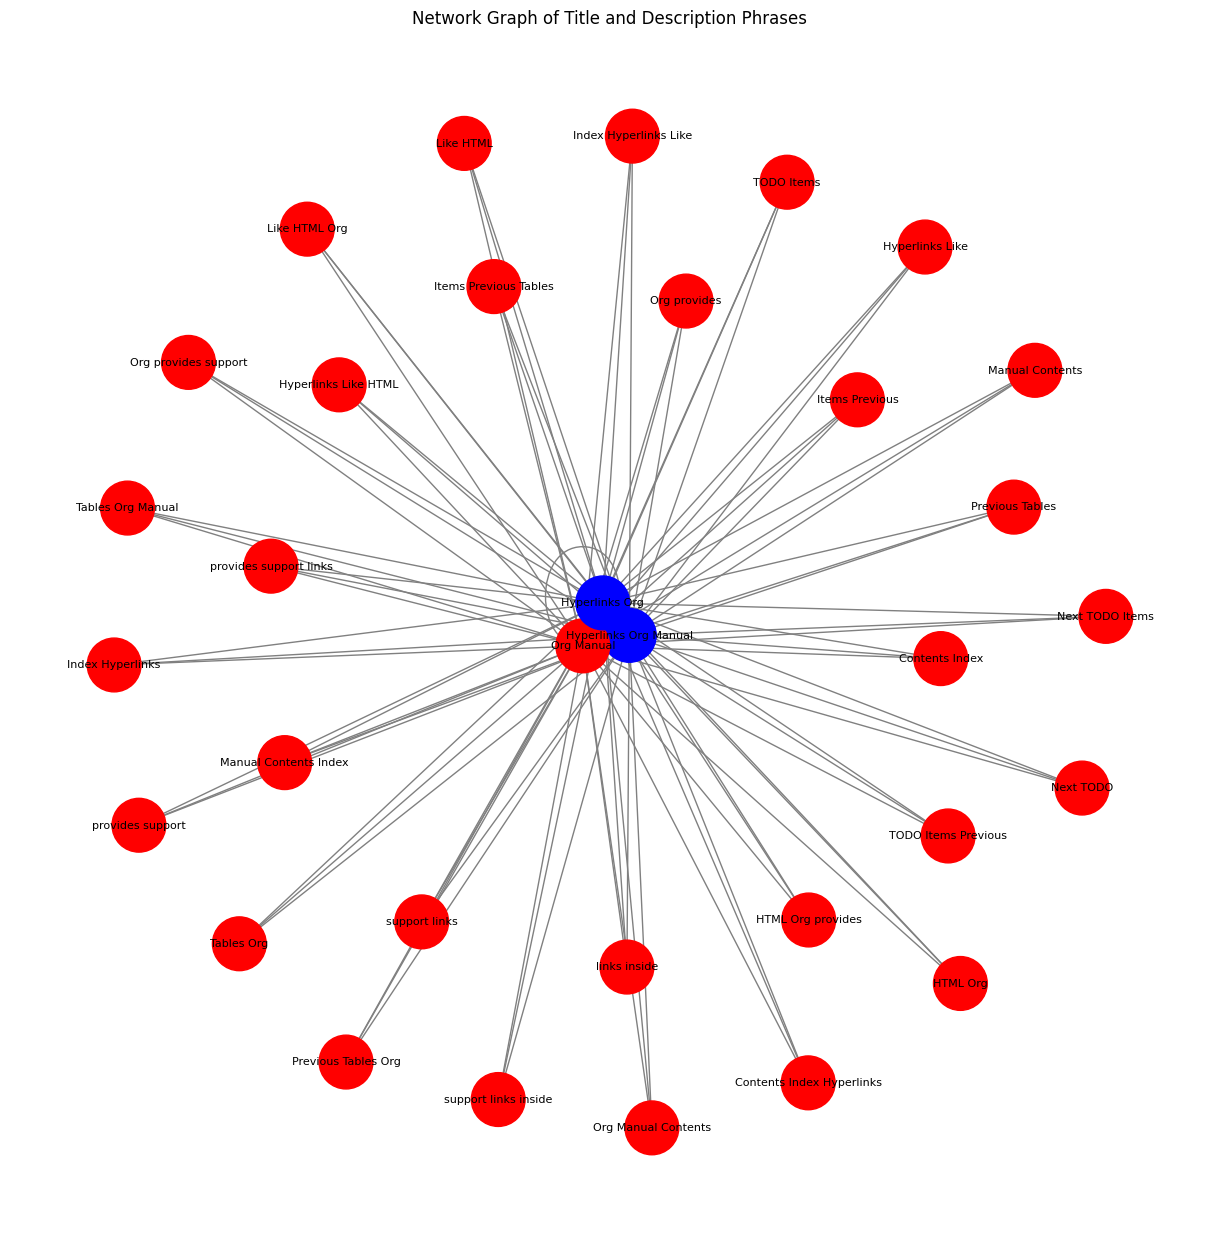

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_keywords_network(analysis_results):
    G = nx.Graph()

    for item in analysis_results:
        title_keywords = item['Title Phrases']
        description_keywords = item['Description Phrases']

        # Add nodes for each keyword
        for word in title_keywords:
            G.add_node(word, type='title', color='blue')

        for word in description_keywords:
            G.add_node(word, type='description', color='red')

        # Add edges between title and description keywords
        for title_word in title_keywords:
            for desc_word in description_keywords:
                G.add_edge(title_word, desc_word)
        break
    # Set node colors
    colors = [G.nodes[node]['color'] for node in G.nodes]

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, with_labels=True, node_color=colors, font_size=8, node_size=1500, edge_color='gray')
    plt.title("Network Graph of Title and Description Phrases")
    plt.show()

# Example usage
plot_keywords_network(url_analysis)


## Similarity Ratio

To create a function that computes the similarity ratio of a given phrase with each title and description, we can use cosine similarity from the scikit-learn library. This method measures the cosine of the angle between two non-zero vectors in a multi-dimensional space, which in our case will be vectors representing text.

First, install the necessary libraries:

In [ ]:
pip install scikit-learn nltk

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure the necessary NLTK components are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def calculate_similarity(main_phrase, titles_descriptions):
    # Preprocess and tokenize the texts
    stop_words = set(stopwords.words('english'))

    def tokenize(text):
        words = word_tokenize(text)
        return [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Combine the main phrase with titles and descriptions
    texts = [main_phrase] + [item['Title'] + " " + item['Description'] for item in titles_descriptions]

    # Compute TF-IDF representation
    vectorizer = TfidfVectorizer(tokenizer=tokenize)
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Calculate cosine similarities
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

    return cosine_similarities


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# change the following phrase base on your website
main_phrase = "Providing hyperlinks for next TODO items in Org Manual"
similarity_scores = calculate_similarity(main_phrase, url_analysis)

for i, item in enumerate(url_analysis):
    print(f"URL: {item['URL']}, Similarity Score: {similarity_scores[i]}")

URL: https://orgmode.org/manual/Hyperlinks.html, Similarity Score: 0.5455883361341183
URL: https://orgmode.org/manual/Links-in-HTML-export.html, Similarity Score: 0.039278886398490906
URL: https://orgmode.org/manual/HTML-Export.html, Similarity Score: 0.0652206272058031
URL: https://orgmode.org/manual/Advanced-Export-Configuration.html, Similarity Score: 0.044752754568532976
URL: https://orgmode.org/manual/Timestamps.html, Similarity Score: 0.05298978132778555
URL: https://orgmode.org/manual/Global-and-local-cycling.html, Similarity Score: 0.04116296536829227
URL: https://orgmode.org/manual/LaTeX-fragments.html, Similarity Score: 0.045739851660158676
URL: https://orgmode.org/manual/Hooks.html, Similarity Score: 0.08330911705906842
URL: https://orgmode.org/manual/ODT-specific-export-settings.html, Similarity Score: 0.030963668836741648


In [ ]:
pip install scipy

In [ ]:
#extract readability scores from the readability's data
def extract_readability_scores(readability_data):
    # Extracting only the scores from the readability data
    scores = [item[2] for item in readability_data]  # assuming the score is the third element
    return scores
readability_scores_only = extract_readability_scores(readability_scores)
#print(scores_only)


To create a Lagrange polynomial given a set of points where y is the similarity score and x is the readability score, we'll use the scipy library in Python, which has a convenient method for constructing Lagrange polynomials.

First, ensure you have scipy installed:

pip install scipy


[12.3, 9.5, 13.1, 15.4, 11.9, 11.1, 14.2]
[0.54558834 0.03927889 0.06522063 0.04475275 0.05298978 0.04116297
 0.04573985]


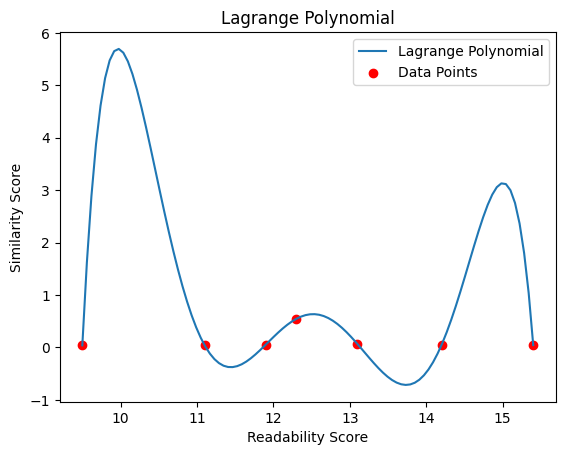

In [ ]:
"""
Here's a function that constructs the Lagrange polynomial given the sets of y (similarity scores) and x (readability scores):
"""

from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

def create_lagrange_polynomial(x_points, y_points):
    # Ensure that the lengths of x_points and y_points are the same
    if len(x_points) != len(y_points):
        raise ValueError("The length of x_points must be equal to the length of y_points")

    # Construct the Lagrange polynomial
    polynomial = lagrange(x_points, y_points)

    return polynomial

# Example usaget
# Edit: remove duplicate points
x_points = readability_scores_only
x_points.remove(11.9)
x_points.remove(14.2)
print(x_points)
y_points = similarity_scores
y_points = y_points[:-2]
print(y_points)

polynomial = create_lagrange_polynomial(x_points, y_points)

# Plotting the polynomial
x_range = np.linspace(min(x_points), max(x_points), 100)
y_range = polynomial(x_range)

plt.plot(x_range, y_range, label='Lagrange Polynomial')
plt.scatter(x_points, y_points, color='red', label='Data Points')
plt.xlabel('Readability Score')
plt.ylabel('Similarity Score')
plt.title('Lagrange Polynomial')
plt.legend()
plt.show()


Solve a Lagrange polynomial using Newton's method. Newton's method is an iterative numerical technique used to approximate the roots of a real-valued function.

First, ensure you have numpy and scipy installed:
pip install numpy scipy

In [ ]:
from scipy.optimize import newton


# Newton's method to find roots of the polynomial
def find_roots(polynomial, x_guesses):
    roots = []
    for guess in x_guesses:
        try:
            root = newton(polynomial, guess)
            roots.append(root)
        except RuntimeError:
            print(f"Failed to converge for guess: {guess}")
    return roots

# Initial guesses for roots
initial_guesses = [11, 12, 13, 14]

# Find roots
roots = find_roots(polynomial, initial_guesses)
print("Roots of the polynomial:", roots)


Roots of the polynomial: [11.116221209761347, 11.862999810974443, 13.13845785972745, 14.186216069273213]
